# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Sendy has hired you to help predict the estimated time of delivery of orders, from the
point of driver pickup to the point of arrival at the final destination. Build a model that
predicts an accurate delivery time, from picking up a package arriving at the final
destination.

### b) Defining the Metric for Success

The metrics we will use to evaluate our model are RMSE and R2 scores.

### c) Understanding the Context 

Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to
320%; while in Europe, it only accounts for up to 90% of the manufacturing cost. Sendy
is a business-to-business platform established in 2014, to enable businesses of all types
and sizes to transport goods more efficiently across East Africa. The company is
headquartered in Kenya with a team of more than 100 staff, focused on building practical
solutions for Africa’s dynamic transportation needs, from developing apps and web
solutions to providing dedicated support for goods on the move.

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data provided was relevant to answering the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [49]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
# normalization
from sklearn.preprocessing import MinMaxScaler
# standardization
from sklearn.preprocessing import StandardScaler 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [3]:
# loading and previewing dataset
df = pd.read_csv('https://bit.ly/3deaKEM')
print(df.shape)
df.head()

(21201, 29)


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [4]:
# loading glossary
glossary = pd.read_csv('https://bit.ly/30O3xsr', header = None)
glossary

,0,1
0,Order No,Unique number identifying the order
1,User Id,Unique number identifying the customer on a platform
2,Vehicle Type,"For this competition limited to bikes, however in practice Sendy service extends to trucks and vans"
3,Platform Type,"Platform used to place the order, there are 4 types"
4,Personal or Business,Customer type
5,Placement - Day of Month,Placement - Day of Month i.e 1-31
6,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
7,Placement - Time,Placement - Time - Time of day the order was placed
8,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
9,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)


In [5]:
# checking data types
df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [6]:
# check for duplicates
df.duplicated().sum()

0

In [7]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(21201, 29)

<i> No duplicates found</i>

In [8]:
# checking for missing data
df.isna().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [9]:
# drop the Precipitation in millimeters column since it has more than 90% Nulls
df.drop(columns=['Precipitation in millimeters'],inplace=True)
df.shape

(21201, 28)

In [10]:
df[df['Temperature'].isnull()].head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
8,Order_No_5234,User_Id_733,Bike,3,Business,30,2,11:10:44 AM,30,2,11:15:49 AM,30,2,12:13:18 PM,30,2,12:22:57 PM,30,2,1:19:35 PM,9,NaN,-1.255189,36.782203,-1.300255,36.825657,Rider_Id_394,3398
14,Order_No_9463,User_Id_248,Bike,3,Business,23,4,10:05:04 AM,23,4,10:05:49 AM,23,4,10:17:51 AM,23,4,10:27:05 AM,23,4,10:33:52 AM,1,NaN,-1.304735,36.784605,-1.299323,36.775337,Rider_Id_607,407
15,Order_No_21335,User_Id_3599,Bike,3,Business,2,4,12:33:50 PM,2,4,12:52:23 PM,2,4,1:17:57 PM,2,4,1:38:25 PM,2,4,2:10:11 PM,13,NaN,-1.330300,36.870793,-1.264474,36.808346,Rider_Id_427,1906
16,Order_No_21307,User_Id_198,Bike,3,Business,19,3,11:57:55 AM,19,3,11:58:07 AM,19,3,12:07:53 PM,19,3,12:15:32 PM,19,3,12:54:00 PM,17,NaN,-1.339626,36.886313,-1.270530,36.798717,Rider_Id_265,2308


In [11]:
# check percentage composition of missing values from Temperature column
df['Temperature'].isnull().sum()/len(df) * 100

20.593368237347295

In [12]:
# We cannot drop 20% of our data, we shall fill with the average Temperature per hour of placement time
df[df['Temperature'].isnull()]['Placement - Time'].unique()

array(['12:39:25 PM', '11:10:44 AM', '10:05:04 AM', ..., '2:00:36 PM',
       '2:09:37 PM', '5:02:09 PM'], dtype=object)

In [13]:
# let's create a function that converts the time from 12 hour system (AM/PM) to 24 Hour System
def convert_12_to_24_hour(time):
  in_time = datetime.strptime(time, "%I:%M:%S %p")
  out_time = datetime.strftime(in_time, "%H%M%S")
  return out_time

In [14]:
tm = '11:10:44 AM'
print(convert_12_to_24_hour(tm))

111044


In [15]:
# convert time columns from 12 hour to 24 hour system
df['placement_time_24'] = df['Placement - Time'].apply(convert_12_to_24_hour)
df['confirmation_time_24'] = df['Confirmation - Time'].apply(convert_12_to_24_hour)
df['arrival_at_pickup_time_24'] = df['Arrival at Pickup - Time'].apply(convert_12_to_24_hour)
df['pickup_time_24'] = df['Pickup - Time'].apply(convert_12_to_24_hour)
df['arrival_at_destination_time_24'] = df['Arrival at Destination - Time'].apply(convert_12_to_24_hour)

# create a column to pick the Hour of placement time
df['placement_time_HH'] = df['placement_time_24'].apply(lambda x: str(x)[:2])
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,placement_time_24,confirmation_time_24,arrival_at_pickup_time_24,pickup_time_24,arrival_at_destination_time_24,placement_time_HH
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,093546,094010,100447,102730,103955,09
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,111616,112321,114022,114409,121722,11
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,123925,124244,124934,125303,130038,12
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,092534,092605,093756,094306,100527,09
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,095518,095618,100353,100523,102537,09


In [16]:
# get the average of temperature per hour of placement
round(df.groupby('placement_time_HH')['Temperature'].mean(),1)

placement_time_HH
00    18.6
06    16.4
07    18.6
08    18.7
09    19.2
10    22.6
11    23.3
12    23.5
13    24.9
14    25.4
15    25.0
16    23.9
17    23.4
18    22.9
19    20.7
20    19.6
21    18.8
22    17.8
Name: Temperature, dtype: float64

In [17]:
# now let's fill the null Temperature with the average per Hour of delivery
df['Temperature'] = round(df['Temperature'].fillna(df.groupby('placement_time_HH')['Temperature'].transform('mean')),1)
# let's test if there are any remaining nulls
df.isnull().sum()

Order No                                     0
User Id                                      0
Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature  

In [18]:
# check for the previous records that had nulls
df.iloc[2]

Order No                                     Order_No_1899
User Id                                        User_Id_265
Vehicle Type                                          Bike
Platform Type                                            3
Personal or Business                              Business
Placement - Day of Month                                30
Placement - Weekday (Mo = 1)                             2
Placement - Time                               12:39:25 PM
Confirmation - Day of Month                             30
Confirmation - Weekday (Mo = 1)                          2
Confirmation - Time                            12:42:44 PM
Arrival at Pickup - Day of Month                        30
Arrival at Pickup - Weekday (Mo = 1)                     2
Arrival at Pickup - Time                       12:49:34 PM
Pickup - Day of Month                                   30
Pickup - Weekday (Mo = 1)                                2
Pickup - Time                                  12:53:03 

In [19]:
# check for the the ones that had temperature (ensure integrity)
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,placement_time_24,confirmation_time_24,arrival_at_pickup_time_24,pickup_time_24,arrival_at_destination_time_24,placement_time_HH
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,093546,094010,100447,102730,103955,09
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,111616,112321,114022,114409,121722,11
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.5,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,123925,124244,124934,125303,130038,12
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,092534,092605,093756,094306,100527,09
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,095518,095618,100353,100523,102537,09


In [20]:
# get the unique value of each variable to ensure there are no anomalies
df.nunique()

Order No                                     21201
User Id                                       3186
Vehicle Type                                     1
Platform Type                                    4
Personal or Business                             2
Placement - Day of Month                        31
Placement - Weekday (Mo = 1)                     7
Placement - Time                             15686
Confirmation - Day of Month                     31
Confirmation - Weekday (Mo = 1)                  7
Confirmation - Time                          15742
Arrival at Pickup - Day of Month                31
Arrival at Pickup - Weekday (Mo = 1)             7
Arrival at Pickup - Time                     15767
Pickup - Day of Month                           31
Pickup - Weekday (Mo = 1)                        7
Pickup - Time                                15690
Arrival at Destination - Day of Month           31
Arrival at Destination - Weekday (Mo = 1)        7
Arrival at Destination - Time  

In [21]:
# drop the Vehicle Type since it contains only one category
# drop the Order No, Rider Id and User Id columns since they are not relevant for modelling
# drop the 12 hour system columns since they are no longer needed

cols_drop = ['User Id','Order No','Rider Id','Vehicle Type','Placement - Time','Confirmation - Time',
             'Arrival at Pickup - Time','Pickup - Time','Arrival at Destination - Time',
             'placement_time_HH'
             ]
df.drop(columns=cols_drop,inplace=True)
print(df.shape)
df.head()

(21201, 24)


,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,placement_time_24,confirmation_time_24,arrival_at_pickup_time_24,pickup_time_24,arrival_at_destination_time_24
0,3,Business,9,5,9,5,9,5,9,5,9,5,4,20.4,-1.317755,36.830370,-1.300406,36.829741,745,093546,094010,100447,102730,103955
1,3,Personal,12,5,12,5,12,5,12,5,12,5,16,26.4,-1.351453,36.899315,-1.295004,36.814358,1993,111616,112321,114022,114409,121722
2,3,Business,30,2,30,2,30,2,30,2,30,2,3,23.5,-1.308284,36.843419,-1.300921,36.828195,455,123925,124244,124934,125303,130038
3,3,Business,15,5,15,5,15,5,15,5,15,5,9,19.2,-1.281301,36.832396,-1.257147,36.795063,1341,092534,092605,093756,094306,100527
4,1,Personal,13,1,13,1,13,1,13,1,13,1,9,15.4,-1.266597,36.792118,-1.295041,36.809817,1214,095518,095618,100353,100523,102537


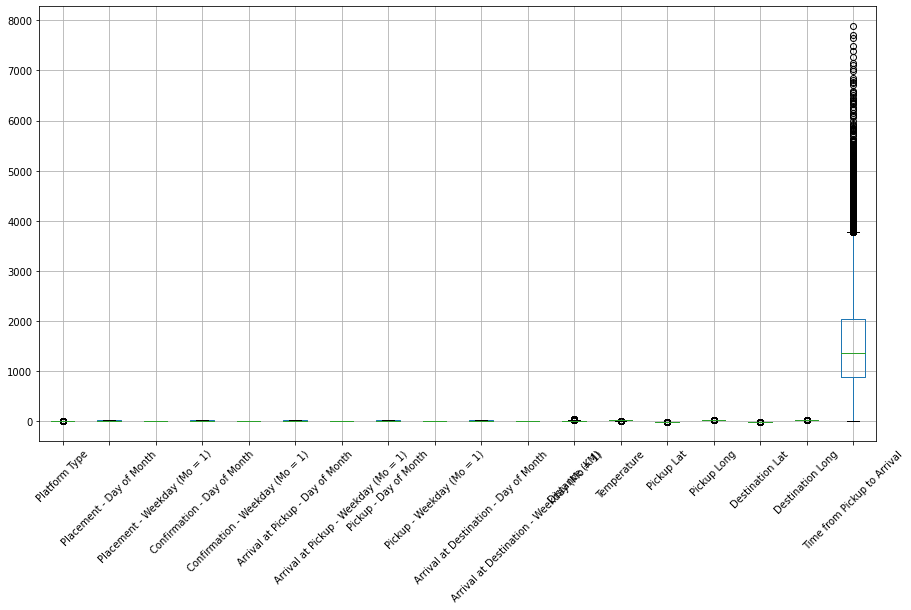

In [22]:
# visualizing the distribution of outliers
plt.figure(figsize = (15, 8))
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

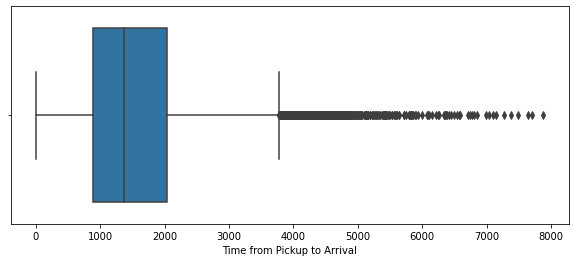

In [23]:
# Check for outliers in the target variable
plt.figure(figsize = (10,4))
sns.boxplot(x=df['Time from Pickup to Arrival'])
plt.show()

In [24]:
# getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.head()

(6303, 24)


,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,placement_time_24,confirmation_time_24,arrival_at_pickup_time_24,pickup_time_24,arrival_at_destination_time_24
1,3,Personal,12,5,12,5,12,5,12,5,12,5,16,26.4,-1.351453,36.899315,-1.295004,36.814358,1993,111616,112321,114022,114409,121722
4,1,Personal,13,1,13,1,13,1,13,1,13,1,9,15.4,-1.266597,36.792118,-1.295041,36.809817,1214,095518,095618,100353,100523,102537
11,1,Business,2,2,2,2,2,2,2,2,2,2,17,26.1,-1.258414,36.804800,-1.286018,36.897534,3898,154320,154416,155918,161727,172225
13,3,Business,25,5,25,5,25,5,25,5,25,5,21,20.9,-1.257147,36.795063,-1.390867,36.767424,2904,091208,091408,091453,092734,101558
19,1,Personal,28,2,28,2,28,2,28,2,28,2,5,19.4,-1.287290,36.820434,-1.289835,36.787270,4220,141253,141455,144222,145007,160027


In [25]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 2)

29.73

<i>We cannot drop the outliers since they are 30% of our dataset.

In [26]:
df.dtypes

Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Distance (KM)                                  int64
Temperature                                  float64
Pickup Lat                                   float64
Pickup Long                                  float64
Destination Lat                              float64
Destination Long                             float64
Time from Pickup to Arrival                   

In [27]:
# convert the time columns to integer
df['placement_time_24'] = df['placement_time_24'].astype(int)
df['confirmation_time_24'] = df['confirmation_time_24'].astype(int)
df['arrival_at_pickup_time_24'] = df['arrival_at_pickup_time_24'].astype(int)
df['pickup_time_24'] = df['pickup_time_24'].astype(int)
df['arrival_at_destination_time_24'] = df['arrival_at_destination_time_24'].astype(int)
df.dtypes

Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Distance (KM)                                  int64
Temperature                                  float64
Pickup Lat                                   float64
Pickup Long                                  float64
Destination Lat                              float64
Destination Long                             float64
Time from Pickup to Arrival                   

In [28]:
df.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,placement_time_24,confirmation_time_24,arrival_at_pickup_time_24,pickup_time_24,arrival_at_destination_time_24
0,3,Business,9,5,9,5,9,5,9,5,9,5,4,20.4,-1.317755,36.830370,-1.300406,36.829741,745,93546,94010,100447,102730,103955
1,3,Personal,12,5,12,5,12,5,12,5,12,5,16,26.4,-1.351453,36.899315,-1.295004,36.814358,1993,111616,112321,114022,114409,121722
2,3,Business,30,2,30,2,30,2,30,2,30,2,3,23.5,-1.308284,36.843419,-1.300921,36.828195,455,123925,124244,124934,125303,130038
3,3,Business,15,5,15,5,15,5,15,5,15,5,9,19.2,-1.281301,36.832396,-1.257147,36.795063,1341,92534,92605,93756,94306,100527
4,1,Personal,13,1,13,1,13,1,13,1,13,1,9,15.4,-1.266597,36.792118,-1.295041,36.809817,1214,95518,95618,100353,100523,102537


# <font color='#2F4F4F'>3. Data Analysis</font>

## 3.1 Univariate Analysis 

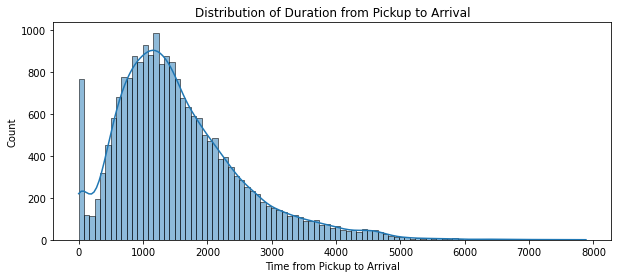

In [29]:
# distribution of price
plt.figure(figsize = (10,4))
sns.histplot(df['Time from Pickup to Arrival'],kde=True)
plt.title('Distribution of Duration from Pickup to Arrival')
plt.show()

<i> the target variable is skewed towards the right (positively skewed)

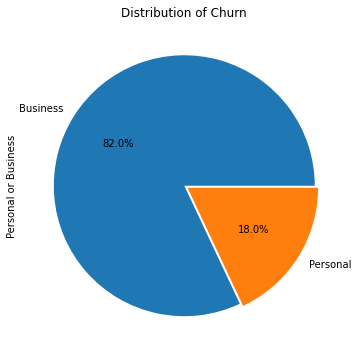

In [30]:
df['Personal or Business'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%', figsize = [8, 6], explode = (0, 0.03))
plt.title("Distribution of Churn")
plt.show()

<i>Most of the orders came from Business customers

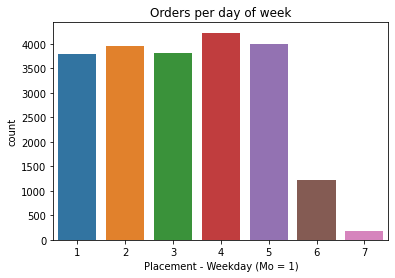

In [31]:
# check for distribution according to day of week
sns.countplot(x=df['Placement - Weekday (Mo = 1)'])
plt.title('Orders per day of week')
plt.show()

<i>Most orders were placed on Thursdays

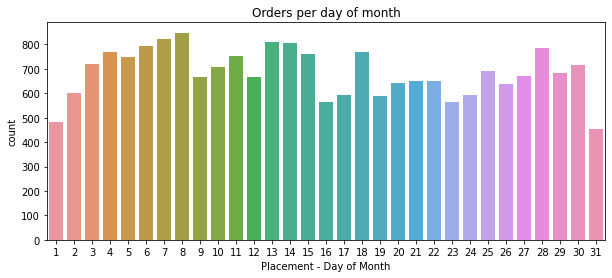

In [32]:
# check for distribution according to day of month
plt.figure(figsize = (10,4))
sns.countplot(x=df['Placement - Day of Month'])
plt.title('Orders per day of month')
plt.show()

## 3.2 Bivariate Analysis

In [33]:
corr = df.corr()
corr

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,placement_time_24,confirmation_time_24,arrival_at_pickup_time_24,pickup_time_24,arrival_at_destination_time_24
Platform Type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.005528,0.204452,-0.002742,0.021327,0.006319,0.043924,-0.003827,-0.025821,-0.022476,-0.027571,-0.023223,-0.023466
Placement - Day of Month,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.009423,-0.004929,-0.005453,0.007541,0.002077,-0.014710,0.008726,0.008680,0.006475,0.006674,0.005475
Placement - Weekday (Mo = 1),-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.015754,-0.000918,0.011008,-0.004299,-0.000875,0.009693,-0.008100,-0.006893,-0.005590,-0.003921,-0.002739
Confirmation - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.009424,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008728,0.008683,0.006478,0.006677,0.005479
Confirmation - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.015763,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.008090,-0.006876,-0.005574,-0.003902,-0.002714
Arrival at Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.009424,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008728,0.008683,0.006478,0.006677,0.005479
Arrival at Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.015763,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.008090,-0.006876,-0.005574,-0.003902,-0.002714
Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.009424,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008728,0.008683,0.006478,0.006677,0.005479
Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.015763,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.008090,-0.006876,-0.005574,-0.003902,-0.002714
Arrival at Destination - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.009424,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008728,0.008683,0.006478,0.006677,0.005479


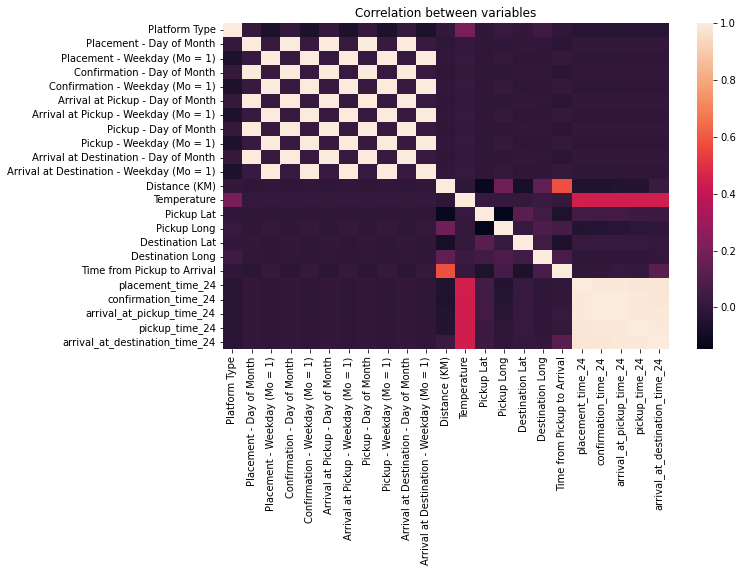

In [34]:
# heatmap to show correlation
plt.figure(figsize = (10,6))
sns.heatmap(corr)
plt.title('Correlation between variables')
plt.show()

<i>All variables had low correlation to the time taken from Pickup to Arrival except the distance from Pickup to Destination

In [35]:
df.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,placement_time_24,confirmation_time_24,arrival_at_pickup_time_24,pickup_time_24,arrival_at_destination_time_24
0,3,Business,9,5,9,5,9,5,9,5,9,5,4,20.4,-1.317755,36.830370,-1.300406,36.829741,745,93546,94010,100447,102730,103955
1,3,Personal,12,5,12,5,12,5,12,5,12,5,16,26.4,-1.351453,36.899315,-1.295004,36.814358,1993,111616,112321,114022,114409,121722
2,3,Business,30,2,30,2,30,2,30,2,30,2,3,23.5,-1.308284,36.843419,-1.300921,36.828195,455,123925,124244,124934,125303,130038
3,3,Business,15,5,15,5,15,5,15,5,15,5,9,19.2,-1.281301,36.832396,-1.257147,36.795063,1341,92534,92605,93756,94306,100527
4,1,Personal,13,1,13,1,13,1,13,1,13,1,9,15.4,-1.266597,36.792118,-1.295041,36.809817,1214,95518,95618,100353,100523,102537


In [36]:
corr['Time from Pickup to Arrival'].abs().sort_values(ascending=False)

Time from Pickup to Arrival                  1.000000
Distance (KM)                                0.580608
arrival_at_destination_time_24               0.119141
Destination Long                             0.070425
Destination Lat                              0.061872
Pickup Long                                  0.060285
Pickup Lat                                   0.053823
arrival_at_pickup_time_24                    0.017906
Placement - Day of Month                     0.014710
Arrival at Destination - Day of Month        0.014701
Arrival at Pickup - Day of Month             0.014701
Pickup - Day of Month                        0.014701
Confirmation - Day of Month                  0.014701
pickup_time_24                               0.011203
Arrival at Destination - Weekday (Mo = 1)    0.009744
Pickup - Weekday (Mo = 1)                    0.009744
Arrival at Pickup - Weekday (Mo = 1)         0.009744
Confirmation - Weekday (Mo = 1)              0.009744
Placement - Weekday (Mo = 1)

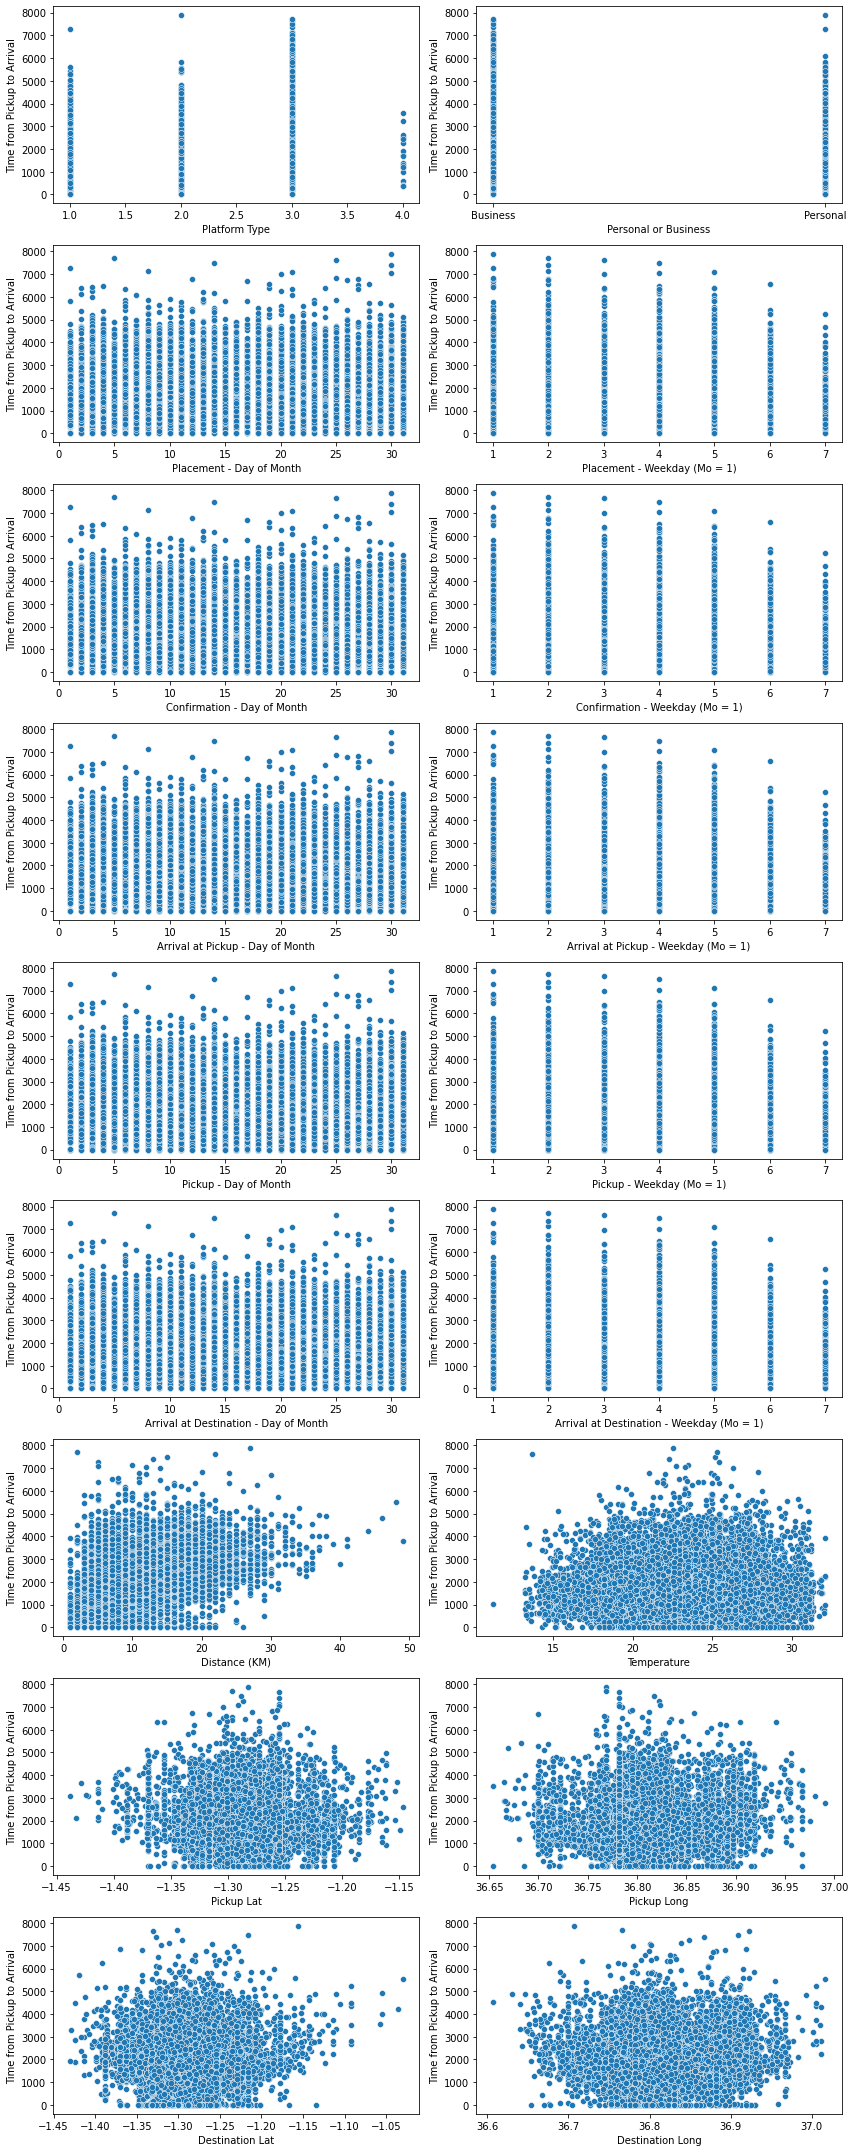

In [37]:
# creating scatterplots to observe the relationship between Time from Pickup to Arrival and the variables
col_features = df.columns.to_list()
col_features.remove('Time from Pickup to Arrival')
fig, axes = plt.subplots(nrows = 9, ncols = 2, figsize = (12, 30))

for ax, col in zip(axes.flatten(), col_features):
    sns.scatterplot(x=df[col], y=df['Time from Pickup to Arrival'], ax = ax)
    plt.xlabel("{}".format(col))
    plt.ylabel("Time from Pickup to Arrival")
    
plt.tight_layout()

In [38]:
# encode the Personal or Business column
# convert the column to a category data type
df['Personal or Business'] = df['Personal or Business'].astype('category')
# substitute the string categories with the numeric codes
df['Personal or Business'] = df['Personal or Business'].cat.codes
df.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,placement_time_24,confirmation_time_24,arrival_at_pickup_time_24,pickup_time_24,arrival_at_destination_time_24
0,3,0,9,5,9,5,9,5,9,5,9,5,4,20.4,-1.317755,36.830370,-1.300406,36.829741,745,93546,94010,100447,102730,103955
1,3,1,12,5,12,5,12,5,12,5,12,5,16,26.4,-1.351453,36.899315,-1.295004,36.814358,1993,111616,112321,114022,114409,121722
2,3,0,30,2,30,2,30,2,30,2,30,2,3,23.5,-1.308284,36.843419,-1.300921,36.828195,455,123925,124244,124934,125303,130038
3,3,0,15,5,15,5,15,5,15,5,15,5,9,19.2,-1.281301,36.832396,-1.257147,36.795063,1341,92534,92605,93756,94306,100527
4,1,1,13,1,13,1,13,1,13,1,13,1,9,15.4,-1.266597,36.792118,-1.295041,36.809817,1214,95518,95618,100353,100523,102537


# <font color='#2F4F4F'>4. Data Modeling</font>

#### Feature Transformation: <font color="blue">Principal Component Analysis</font>

In [39]:
# select features and target
X = df.drop('Time from Pickup to Arrival',axis=1)
y = df['Time from Pickup to Arrival']

In [50]:
# Create our base models and check for the accuracy to later compare it
# later with our PCA implementation.
# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing normalisation  
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# initializing our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=0)
rf_regressor = RandomForestRegressor(random_state=0)
lr_regressor = LinearRegression()

# Fitting in our models  
svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)
lr_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)
rf_y_pred = rf_regressor.predict(X_test)
lr_y_pred = lr_regressor.predict(X_test)

# Finally, evaluating our models  
print('SVM RMSE:', np.sqrt(mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(mean_squared_error(y_test, dec_y_pred)))
print('Random Forest RMSE:', np.sqrt(mean_squared_error(y_test, rf_y_pred)))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, lr_y_pred)))

SVM RMSE: 872.6945516316623
KNN RMSE: 909.9009530083424
Decision Tree RMSE: 689.244910586488
Random Forest RMSE: 528.886439605161
Linear Regression RMSE: 481.96950437963943


In [52]:
df['Time from Pickup to Arrival'].mean() * 0.1

155.69209471251358

<i> All the models did not achieve the desired RMSE (less than 10% of the target mean) with Linear regression having the overall best RMSE

In [53]:
# Let's perform PCA to reduce the dimensionality of large data sets, 
# by transforming the large set of variables into a smaller one that still 
# contains most of the information in the large set.

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# initializing our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=0)
rf_regressor = RandomForestRegressor(random_state=0)
lr_regressor = LinearRegression()

# Fitting in our models  
svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)
lr_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)
rf_y_pred = rf_regressor.predict(X_test)
lr_y_pred = lr_regressor.predict(X_test)

# Finally, evaluating our models  
print('SVM RMSE:', np.sqrt(mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(mean_squared_error(y_test, dec_y_pred)))
print('Random Forest RMSE:', np.sqrt(mean_squared_error(y_test, rf_y_pred)))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, lr_y_pred)))

SVM RMSE: 874.4744377704039
KNN RMSE: 909.9009530083424
Decision Tree RMSE: 599.184479440558
Random Forest RMSE: 372.7546310859921
Linear Regression RMSE: 481.9685038314084


In [ ]:
# # without PCA
# SVM RMSE: 872.6945516316623
# KNN RMSE: 909.9009530083424
# Decision Tree RMSE: 689.244910586488
# Random Forest RMSE: 528.886439605161
# Linear Regression RMSE: 481.96950437963943

<i> Random Forest model improved on it's RMSE significantly by reducing from <b>528.89 to 372.75</b> while other models slightly improved or dropped

# <font color='#2F4F4F'>5. Summary of Findings</font>

<i> PCA improved performance of our models. Random Forest regressor emerged as our best model

# <font color='#2F4F4F'>6. Recommendations</font>

<i>Sendy can rely on Random Forest model to predict their time taken between placement and delivery of orders

# <font color='#2F4F4F'>7. Challenging your Solution</font>

### a) Did we have the right question?
<i> Yes, the analytics question was right to address the problem we needed to solve </i>

### b) Did we have the right data?
<i>The data was relevant in coming up with the model that could predict the time taken to deliver orders</i>

### c) What can be done to improve the solution?
<i> More hyperparameter tuning can be done on the models to improve on the performance</i>